In [31]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import src
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 1000
STANDARD_DEVIATION = 0.15
A = -10
B = 10

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
def generate_data():
    X = (np.random.rand(SAMPLE_SIZE) - A) * (B - A)
    eps = np.random.randn(SAMPLE_SIZE) * STANDARD_DEVIATION
    y = np.sin(X) + eps
    return X, y

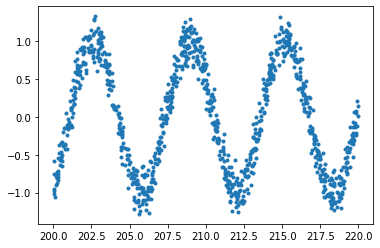

In [35]:
X,y = generate_data()
plt.plot(X, y, '.')

# The Bias Variance trade-off

$$
\begin{align}
E[(Y - \hat{f}(x))^2]
    &=  E[\left(f(x) + \epsilon -\hat{f}(x)\right)^2] \\
    &= E[\left(f(x) - \hat{f}(x)\right)^2] + E[\epsilon^2] + 2 E[(f(x) - \hat{f}(x))\epsilon] \\
    &= E[\left(f(x) - \hat{f}(x)\right)^2] + \sigma^2_\epsilon + 2 E[(f(x) - \hat{f}(x))] E[\epsilon] \\
    &= E[\left(f(x) - \hat{f}(x) - E[\hat{f}(x)] + E[\hat{f}(x)]\right)^2] + \sigma^2_\epsilon \\
    &= E[
            \left(f(x) - E[\hat{f}(x)]\right)^2 +
            \left(E[\hat{f}(x)] - \hat{f}(x)\right)^2 + 
            2 \left(f(x) - E[\hat{f}(x)]\right) \left(E[\hat{f}(x)] - \hat{f}(x)\right)
       ] +
       \sigma^2_\epsilon \\
    &= \left(f(x) - E[\hat{f}(x)]\right)^2 + E[\left(E[\hat{f}(x)] - \hat{f}(x)\right)^2] + \sigma^2_\epsilon \\
    &= \text{Bias}(\hat{f}) + \text{Var}(\hat{f}) + \sigma^2_\epsilon
\end{align}
$$

$\hat{f}(x) = \frac{1}{k} \sum_{i\in\mathcal{N}_S(x)}Y_i$

$$
\begin{align}
\text{Var}[\hat{f}(x)]
    &= E[\text{Var}[\hat{f}(x) | X_1, \dots, X_N]] + \text{Var}[E[\hat{f}(x) | X_1, \dots, X_N]]\\
    &= \frac{1}{k}  E[\sum_{i\in\mathcal{N}_S(x)} f(X_i) + \epsilon_i]
\end{align}
$$

Notice that:

$$
\begin{align}
E[\hat{f}(x) | X_1, \dots, X_N] 
    &= E[\frac{1}{k} \sum_{i\in\mathcal{N}_S(x)} f(X_i) + \epsilon_i | X_1, \dots, X_N] \\
    &= \frac{1}{k} \left(E[\sum_{i\in\mathcal{N}_S(x)} f(X_i)| X_1, \dots, X_N] + E[\sum_{i\in\mathcal{N}_S(x)} \epsilon_i | X_1, \dots, X_N] \right) \\
    &= \frac{1}{k} \left(\sum_{i\in\mathcal{N}_S(x)} f(X_i) + E[\sum_{i\in\mathcal{N}_S(x)} E[\epsilon_i | X_1, \dots, X_N]| X_1, \dots, X_N] \right) \\
    &= \frac{1}{k} \left(\sum_{i\in\mathcal{N}_S(x)} f(X_i) + E[\sum_{i\in\mathcal{N}_S(x)} E[\epsilon_i]| X_1, \dots, X_N] \right) \\
    &= \frac{1}{k} \sum_{i\in\mathcal{N}_S(x)} f(X_i) \\
\end{align}
$$

So 

$$
\begin{align}
E[\text{Var}[\hat{f}(x) | X_1, \dots, X_N]]
    &= E[\left( \hat{f}(x) - E[\hat{f}(x) | X_1, \dots, X_N] \right)^2| X_1, \dots, X_N] \\
    &= E[\left( \frac{1}{k} \sum_{i\in\mathcal{N}_S(x)} f(X_i) + \epsilon_i - \frac{1}{k} \sum_{i\in\mathcal{N}_S(x)} f(X_i) \right)^2| X_1, \dots, X_N] \\
    &= \frac{1}{k^2} E[\left(\sum_{i\in\mathcal{N}_S(x)} \epsilon_i \right)^2| X_1, \dots, X_N] \\
    &= \frac{k\sigma_\epsilon^2}{k^2} \\
    &= \frac{\sigma_\epsilon^2}{k} \\
\end{align}
$$

and 

$$
\begin{align}
\text{Var}[E[\hat{f}(x) | X_1, \dots, X_N]] 
    &= \text{Var}[\frac{1}{k} \sum_{i\in\mathcal{N}_S(x)} f(X_i)]
\end{align}
$$